**Load Clinical Dataset**

In [1]:
import pandas as pd

path = "BPD-Neo-clinical_data.xlsx"
df = pd.read_excel(path)
df.head()


,ID,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),Jensen 2019 BPD Definition
0,BPD-Neo-01,3275,48.0,M,2030,32.42857142857143,38.42857142857143,N/A (preterm >32w)
1,BPD-Neo-02,3718,51.0,M,1010,24.714285714285715,38.42857142857143,Grade I
2,BPD-Neo-03,2890,48.5,F,890,28,40,Grade II
3,BPD-Neo-04,3203,50.5,F,3110,38.57142857142857,39.714285714285715,N/A (term)
4,BPD-Neo-05,3975,51.0,F,630,29,47.857142857142854,Grade II


**Clean Clinical Labels**

In [2]:
df_clean = df.copy()

df_clean["Jensen 2019 BPD Definition"] = df_clean["Jensen 2019 BPD Definition"].astype(str).str.strip()

valid = ["Grade I", "Grade II", "Grade III"]
df_clean = df_clean[df_clean["Jensen 2019 BPD Definition"].isin(valid)]

def map_label(x):
    if x == "Grade I":
        return 0
    if x in ["Grade II", "Grade III"]:
        return 1
    return None

df_clean["Label"] = df_clean["Jensen 2019 BPD Definition"].apply(map_label).astype(int)

df_clean.reset_index(drop=True, inplace=True)
df_clean


,ID,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),Jensen 2019 BPD Definition,Label
0,BPD-Neo-02,3718,51.0,M,1010,24.714285714285715,38.42857142857143,Grade I,0
1,BPD-Neo-03,2890,48.5,F,890,28,40,Grade II,1
2,BPD-Neo-05,3975,51.0,F,630,29,47.857142857142854,Grade II,1
3,BPD-Neo-07,3952,52.0,F,550,28.428571428571427,49,Grade II,1
4,BPD-Neo-08,3505,49.0,F,610,25.428571428571427,42,Grade II,1
5,BPD-Neo-09,3730,57.5,F,720,25.428571428571427,42,Grade II,1
6,BPD-Neo-12,7542,67.0,F,680,24.571428571428573,62.857142857142854,Grade II,1
7,BPD-Neo-13,5327,58.0,M,665,24.428571428571427,52,Grade II,1
8,BPD-Neo-14,2390,43.0,F,875,30.142857142857142,40.714285714285715,Grade II,1
9,BPD-Neo-15,3622,49.0,M,960,26.714285714285715,39.857142857142854,Grade II,1


**Dataset Overview**

In [3]:
print("Rows:", df_clean.shape[0])
print(df_clean["Label"].value_counts())

df_clean.describe(include="all")

Rows: 33
Label
1    23
0    10
Name: count, dtype: int64


,ID,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),Jensen 2019 BPD Definition,Label
count,33,33.000000,33.000000,33,33.000000,33,33,33,33.000000
unique,33,NaN,NaN,2,NaN,20,25,3,NaN
top,BPD-Neo-02,NaN,NaN,F,NaN,26.714285714285715,38.42857142857143,Grade II,NaN
freq,1,NaN,NaN,19,NaN,3,3,22,NaN
mean,NaN,3506.939394,50.136364,NaN,841.969697,NaN,NaN,NaN,0.696970
std,NaN,966.708621,4.557399,NaN,234.137177,NaN,NaN,NaN,0.466694
min,NaN,2145.000000,43.000000,NaN,550.000000,NaN,NaN,NaN,0.000000
25%,NaN,3025.000000,48.000000,NaN,680.000000,NaN,NaN,NaN,0.000000
50%,NaN,3470.000000,49.500000,NaN,800.000000,NaN,NaN,NaN,1.000000
75%,NaN,3730.000000,52.000000,NaN,920.000000,NaN,NaN,NaN,1.000000


**Class Distribution**

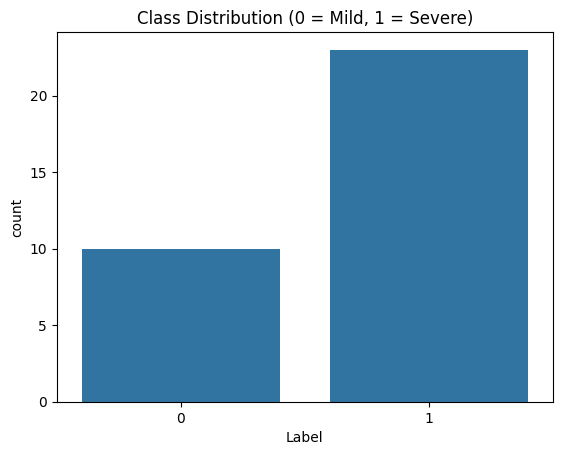

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_clean, x="Label")
plt.title("Class Distribution (0 = Mild, 1 = Severe)")
plt.show()


**Numerical Preprocessing**

In [5]:
num_cols = ["Weight (g)", "Length (cm)", "BW (grams)", "GA (weeks)", "PMA at Study (weeks)"]

df_clean[num_cols] = df_clean[num_cols].apply(pd.to_numeric, errors="coerce")
df_clean[num_cols].isna().sum()


,0
Weight (g),0
Length (cm),0
BW (grams),0
GA (weeks),2
PMA at Study (weeks),5


**Clinical Feature Visualizations**

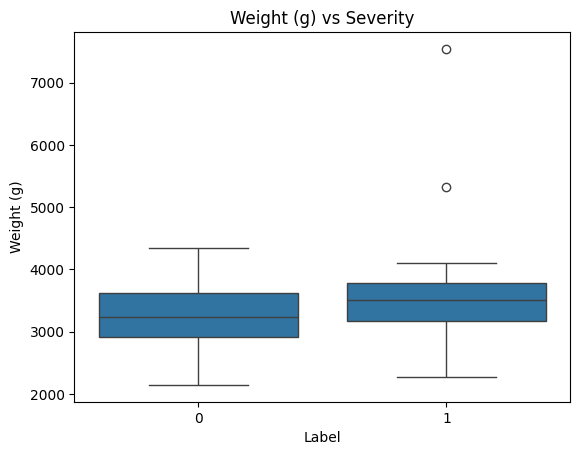

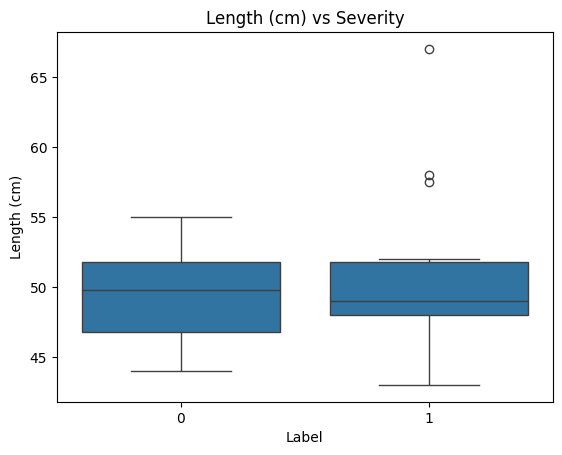

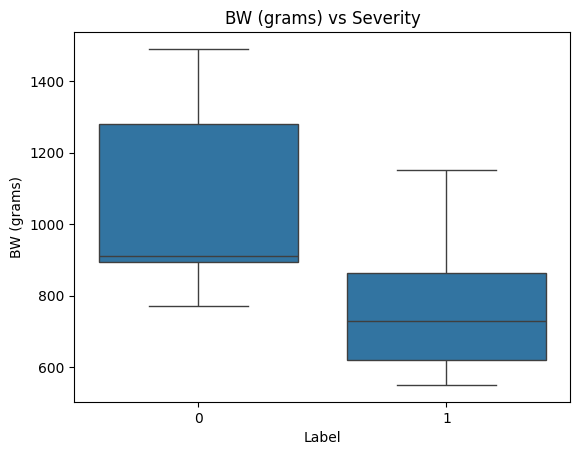

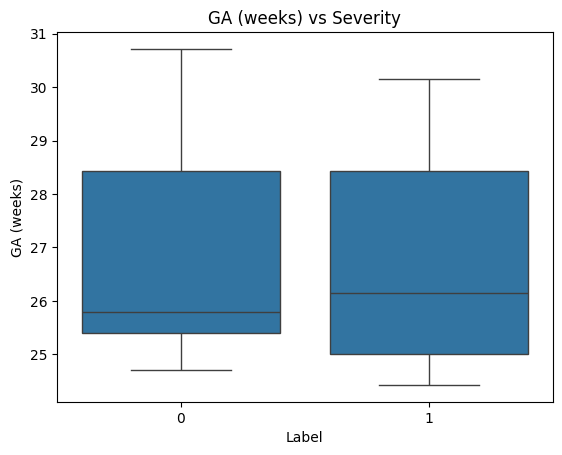

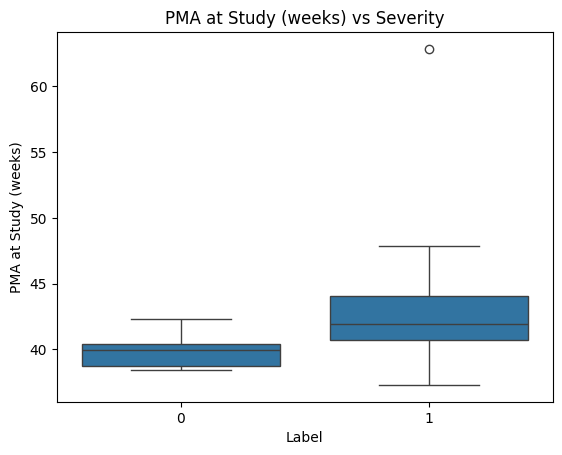

In [6]:
for col in num_cols:
    sns.boxplot(data=df_clean, x="Label", y=col)
    plt.title(f"{col} vs Severity")
    plt.show()


**Group Statistical Tests**

In [7]:
from scipy.stats import mannwhitneyu

results = {}
for col in num_cols:
    mild = df_clean[df_clean["Label"] == 0][col].dropna()
    severe = df_clean[df_clean["Label"] == 1][col].dropna()
    stat, p = mannwhitneyu(mild, severe)
    results[col] = p

results


{'Weight (g)': np.float64(0.31783710356383055),
 'Length (cm)': np.float64(0.9372907689688931),
 'BW (grams)': np.float64(0.0018359701449225491),
 'GA (weeks)': np.float64(0.7031661858554885),
 'PMA at Study (weeks)': np.float64(0.0026967581233888877)}

**Sex vs Severity**

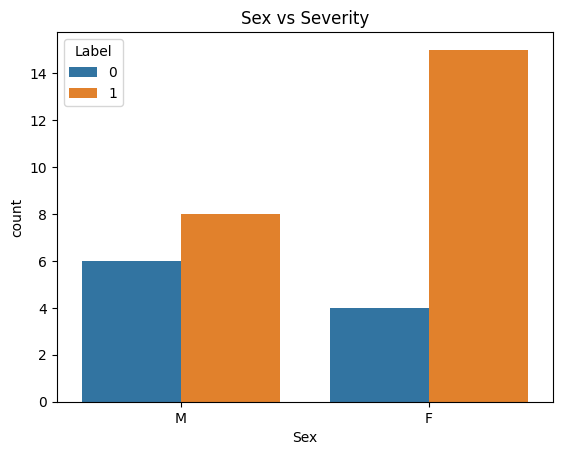

In [8]:
sns.countplot(data=df_clean, x="Sex", hue="Label")
plt.title("Sex vs Severity")
plt.show()


**Categorical Significance Test**

In [9]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df_clean["Sex"], df_clean["Label"])
chi2, p, dof, expected = chi2_contingency(table)
p


np.float64(0.3351312853241327)

**Correlation Analysis**

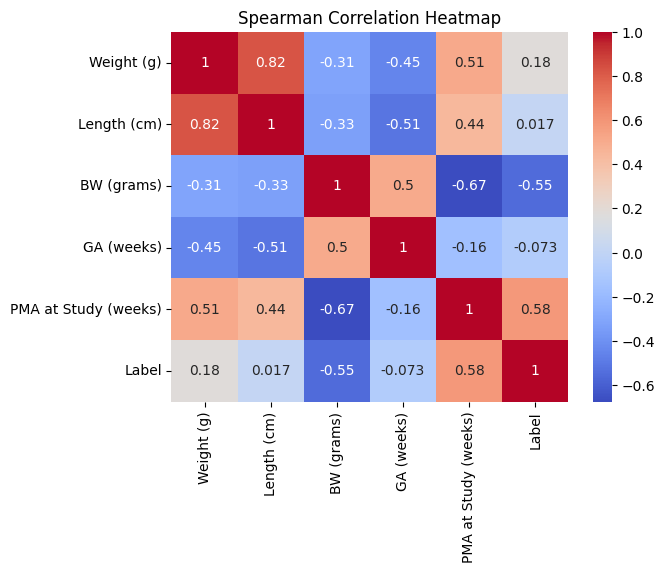

In [10]:
corr = df_clean[num_cols + ["Label"]].corr(method="spearman")

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()


**Prepare Clinical Model Inputs**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

num_cols = ["Weight (g)", "Length (cm)", "BW (grams)", "GA (weeks)", "PMA at Study (weeks)"]
cat_cols = ["Sex"]

df_model = df_clean[num_cols + cat_cols + ["Label"]].copy()

df_model["Sex"] = df_model["Sex"].astype(str).str.upper().map({"M":1, "F":0})

imputer = SimpleImputer(strategy="median")
X = df_model.drop(columns="Label")
y = df_model["Label"].values
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)


**Define Clinical Models**

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(class_weight="balanced", max_iter=500))
])

pipe_rf = Pipeline([
    ("rf", RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42))
])

neg, pos = np.bincount(y_train)
scale_pos_weight = (neg / (pos + 1e-9))

pipe_xgb = Pipeline([
    ("xgb", XGBClassifier(
        n_estimators=300,
        max_depth=3,
        learning_rate=0.05,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

models = {
    "Logistic": pipe_lr,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb
}


**Cross-Validation Setup**

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_cv(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    rows = []
    for tr, val in skf.split(X, y):
        Xtr, Xv = X.iloc[tr], X.iloc[val]
        ytr, yv = y[tr], y[val]

        model.fit(Xtr, ytr)
        prob = model.predict_proba(Xv)[:,1]
        pred = (prob >= 0.5).astype(int)

        rows.append({
            "roc_auc": roc_auc_score(yv, prob),
            "accuracy": accuracy_score(yv, pred),
            "precision": precision_score(yv, pred, zero_division=0),
            "recall": recall_score(yv, pred, zero_division=0),
            "f1": f1_score(yv, pred, zero_division=0)
        })

    df_res = pd.DataFrame(rows)
    return df_res.mean().to_dict(), df_res.std().to_dict()


**Train Clinical Models**

In [14]:
cv_results = {}

for name, model in models.items():
    mean_scores, std_scores = evaluate_cv(model, X_train.reset_index(drop=True), y_train)
    cv_results[name] = {"mean": mean_scores, "std": std_scores}

cv_results


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:51] WARNING: /w

{'Logistic': {'mean': {'roc_auc': 0.85,
   'accuracy': 0.6933333333333334,
   'precision': 0.7833333333333333,
   'recall': 0.7,
   'f1': 0.7347619047619047},
  'std': {'roc_auc': 0.14907119849998599,
   'accuracy': 0.22410315085295485,
   'precision': 0.2173067468400883,
   'recall': 0.24008100484813225,
   'f1': 0.22486831621459746}},
 'RandomForest': {'mean': {'roc_auc': 0.8583333333333332,
   'accuracy': 0.6933333333333334,
   'precision': 0.76,
   'recall': 0.8333333333333333,
   'f1': 0.7849206349206349},
  'std': {'roc_auc': 0.14907119849998599,
   'accuracy': 0.17384539747207065,
   'precision': 0.1781852968120546,
   'recall': 0.1559023911155809,
   'f1': 0.13042220719263936}},
 'XGBoost': {'mean': {'roc_auc': 0.8458333333333332,
   'accuracy': 0.8133333333333332,
   'precision': 0.95,
   'recall': 0.7666666666666666,
   'f1': 0.8414285714285714},
  'std': {'roc_auc': 0.14994211846205488,
   'accuracy': 0.11925695879998878,
   'precision': 0.11180339887498947,
   'recall': 0.1

**Select Best Clinical Model**

In [15]:
best_model_name = max(cv_results.items(), key=lambda kv: kv[1]["mean"]["roc_auc"])[0]
best_model = models[best_model_name]

best_model.fit(X_train, y_train)

y_proba = best_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Best Clinical Model:", best_model_name)
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Clinical Model: RandomForest
Test ROC-AUC: 0.5
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7

Confusion Matrix:
 [[1 1]
 [0 5]]


| **Model**               | **ROC-AUC (Mean ± SD)** | **Accuracy (Mean ± SD)** | **Precision (Mean ± SD)** | **Recall (Mean ± SD)** | **F1 (Mean ± SD)** | **Inference**                                                                                                                 |
| ----------------------- | ----------------------- | ------------------------ | ------------------------- | ---------------------- | ------------------ | ----------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression** | **0.85 ± 0.15**         | **0.69 ± 0.22**          | **0.78 ± 0.22**           | **0.70 ± 0.24**        | **0.73 ± 0.22**    | Performs well for a linear model given few features. Stable AUC but high variance suggests sensitivity to small dataset size. |
| **Random Forest**       | **0.86 ± 0.15**         | **0.69 ± 0.17**          | **0.76 ± 0.18**           | **0.83 ± 0.16**        | **0.78 ± 0.13**    | Strong recall (detects severe cases well). Good AUC, slightly better than LR. More stable F1 score.                           |
| **XGBoost**             | **0.845 ± 0.15**        | **0.81 ± 0.12**          | **0.95 ± 0.11**           | **0.77 ± 0.14**        | **0.84 ± 0.09**    | Best overall. High accuracy and very high precision. Most balanced and strongest classifier of the three.                     |


In [16]:
if best_model_name == "Logistic":
    coefs = best_model.named_steps["lr"].coef_[0]
    importance = pd.Series(coefs, index=X_train.columns).sort_values(key=abs, ascending=False)
else:
    if best_model_name == "RandomForest":
        fi = best_model.named_steps["rf"].feature_importances_
    else:
        fi = best_model.named_steps["xgb"].feature_importances_
    importance = pd.Series(fi, index=X_train.columns).sort_values(ascending=False)

importance


,0
PMA at Study (weeks),0.299438
BW (grams),0.276805
GA (weeks),0.167374
Length (cm),0.113872
Weight (g),0.107492
Sex,0.035019


In [17]:
import joblib

joblib.dump(imputer, "clinical_imputer.joblib")
joblib.dump(best_model, "clinical_best_model.joblib")



['clinical_best_model.joblib']

In [18]:
DRIVE_ROOT = "/content/drive/MyDrive/Nifti-data"

In [19]:
import os, glob, traceback
import numpy as np
import pandas as pd
import cv2
from skimage import io, color, filters, morphology, measure
from skimage.feature import local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops
from scipy import stats


In [20]:
DRIVE_ROOT = "/content/drive/MyDrive/Nifti-data"

def list_patient_dirs(root):
    return [
        os.path.join(root, x)
        for x in sorted(os.listdir(root))
        if x.startswith("BPD-Neo") and os.path.isdir(os.path.join(root, x))
    ]

patient_dirs = list_patient_dirs(DRIVE_ROOT)
len(patient_dirs), patient_dirs[:5]


(40,
 ['/content/drive/MyDrive/Nifti-data/BPD-Neo-01',
  '/content/drive/MyDrive/Nifti-data/BPD-Neo-02',
  '/content/drive/MyDrive/Nifti-data/BPD-Neo-03',
  '/content/drive/MyDrive/Nifti-data/BPD-Neo-04',
  '/content/drive/MyDrive/Nifti-data/BPD-Neo-05'])

In [21]:
def sorted_pngs(folder):
    if not os.path.isdir(folder):
        return []
    return sorted(glob.glob(os.path.join(folder, "*.png")))

def load_gray(path, target_size=(256,256)):
    img = io.imread(path)
    if img.ndim == 3:
        img = color.rgb2gray(img)
    img = (img * 255).astype(np.uint8)
    if target_size:
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
    return img


In [22]:
def safe_stats(arr):
    arr = np.asarray(arr).ravel()
    if arr.size == 0:
        return dict(mean=np.nan, std=np.nan, skew=np.nan, kurt=np.nan,
                    min=np.nan, max=np.nan, med=np.nan, entropy=np.nan)
    hist, _ = np.histogram(arr, bins=32, range=(0,255), density=True)
    hist = hist + 1e-12
    return {
        'mean': float(arr.mean()),
        'std': float(arr.std()),
        'skew': float(stats.skew(arr)) if arr.size > 2 else np.nan,
        'kurt': float(stats.kurtosis(arr)) if arr.size > 3 else np.nan,
        'min': float(arr.min()),
        'max': float(arr.max()),
        'med': float(np.median(arr)),
        'entropy': float(-(hist*np.log2(hist)).sum())
    }


In [23]:
def first_order(img, mask):
    arr = img[mask] if mask is not None else img
    s = safe_stats(arr)
    return {
        "fo_mean": s["mean"], "fo_std": s["std"], "fo_skew": s["skew"],
        "fo_kurt": s["kurt"], "fo_min": s["min"], "fo_max": s["max"],
        "fo_median": s["med"], "fo_entropy": s["entropy"]
    }

def glcm_feats(img, mask, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=32):
    try:
        arr = img.copy().astype(np.uint8)
        if mask is not None:
            arr[~mask] = 0
        arr_q = np.floor(arr/(256/levels)).astype(np.uint8)
        if len(np.unique(arr_q)) < 2:
            return {f"glcm_{p}": np.nan for p in ["contrast","dissimilarity","homogeneity","energy","ASM","correlation"]}
        gl = graycomatrix(arr_q, distances=distances, angles=angles,
                          levels=levels, symmetric=True, normed=True)
        props = {}
        for p in ["contrast","dissimilarity","homogeneity","energy","ASM","correlation"]:
            try:
                props[f"glcm_{p}"] = float(graycoprops(gl, p).mean())
            except:
                props[f"glcm_{p}"] = np.nan
        return props
    except:
        return {f"glcm_{p}": np.nan for p in ["contrast","dissimilarity","homogeneity","energy","ASM","correlation"]}

def lbp_feats(img, P=8, R=1, bins=10):
    try:
        lbp = local_binary_pattern(img, P, R, method="uniform")
        hist, _ = np.histogram(lbp.ravel(), bins=bins, range=(0, P+2), density=True)
        if hist.size < bins:
            hist = np.pad(hist, (0, bins-hist.size))
        return {f"lbp_{i}": float(hist[i]) for i in range(bins)}
    except:
        return {f"lbp_{i}": np.nan for i in range(bins)}

def edge_feats(img, mask):
    try:
        sx = filters.sobel_h(img)
        sy = filters.sobel_v(img)
        mag = np.hypot(sx, sy)
        if mask is not None:
            mag = mag[mask]
        if mag.size == 0:
            return {"edge_mean":np.nan,"edge_std":np.nan,"edge_max":np.nan}
        return {
            "edge_mean": float(mag.mean()),
            "edge_std": float(mag.std()),
            "edge_max": float(mag.max())
        }
    except:
        return {"edge_mean":np.nan,"edge_std":np.nan,"edge_max":np.nan}

def shape_proxy(mask):
    try:
        props = measure.regionprops(mask.astype(int))
        if not props:
            return {"shape_area":0, "shape_bbox":0, "shape_ecc":0, "shape_sol":0}
        p = props[0]
        bbox_area = float((p.bbox[2] - p.bbox[0]) * (p.bbox[3] - p.bbox[1]))
        return {
            "shape_area": float(p.area),
            "shape_bbox": bbox_area,
            "shape_ecc": float(p.eccentricity),
            "shape_sol": float(p.solidity)
        }
    except:
        return {"shape_area":0,"shape_bbox":0,"shape_ecc":0,"shape_sol":0}


In [24]:
def make_mask(img):
    try:
        g = cv2.GaussianBlur(img, (5,5), 0)
        t = filters.threshold_otsu(g)
        bw = g > t
        bw = morphology.remove_small_objects(bw, min_size=300)
        lbl = measure.label(bw)
        props = measure.regionprops(lbl)
        if not props:
            return np.ones_like(img, dtype=bool)
        largest = props[np.argmax([p.area for p in props])].label
        return lbl == largest
    except:
        return np.ones_like(img, dtype=bool)


**RADIONOMICS PIPELINE SECTION**

**Radiomics Preprocessing Functions**

In [25]:
def extract_slice(img_path, mask_path=None, target_size=(256,256)):
    try:
        img = load_gray(img_path, target_size)
    except:
        return None

    mask = None
    if mask_path and os.path.exists(mask_path):
        try:
            m = load_gray(mask_path, target_size)
            mask = m > 0
            if mask.sum() == 0:
                mask = None
        except:
            mask = None

    if mask is None:
        mask = make_mask(img)

    feats = {}
    feats.update(first_order(img, mask))
    feats.update(glcm_feats(img, mask))
    feats.update(lbp_feats(img))
    feats.update(edge_feats(img, mask))
    shp = shape_proxy(mask)
    feats.update(shp)
    return feats


**Extract Per-Patient Radiomics**

In [26]:
def extract_patient(patient_dir):
    img_dir = os.path.join(patient_dir, "image")
    if not os.path.isdir(img_dir):
        return None

    mask_dir = os.path.join(patient_dir, "lung_seg")
    mask_files = sorted_pngs(mask_dir)
    mask_map = {os.path.basename(x): x for x in mask_files}

    rows=[]
    for img_path in sorted_pngs(img_dir):
        fname = os.path.basename(img_path)
        mpath = mask_map.get(fname, None)
        feats = extract_slice(img_path, mpath)
        if feats is not None:
            rows.append(feats)

    if len(rows)==0:
        return None

    df = pd.DataFrame(rows)
    agg = df.agg(["mean","std","min","max","median"]).stack()
    agg = agg.to_dict()
    agg["ID"] = os.path.basename(patient_dir)
    return agg


**Generate Radiomics Table**

In [27]:
radiomics_rows = []
skipped = []

for p in patient_dirs:
    pid = os.path.basename(p)
    print("Processing:", pid)
    try:
        res = extract_patient(p)
        if res is None:
            skipped.append(pid)
        else:
            radiomics_rows.append(res)
    except Exception as e:
        print("Error on:", pid, e)
        skipped.append(pid)

rad_df = pd.DataFrame(radiomics_rows)
rad_df.to_csv("/content/radiomics_patient_table.csv", index=False)

print("Radiomics shape:", rad_df.shape)
print("Skipped:", skipped)
rad_df.head()


Processing: BPD-Neo-01
Processing: BPD-Neo-02
Processing: BPD-Neo-03
Processing: BPD-Neo-04
Processing: BPD-Neo-05
Processing: BPD-Neo-06
Processing: BPD-Neo-07
Processing: BPD-Neo-08
Processing: BPD-Neo-09
Processing: BPD-Neo-10
Processing: BPD-Neo-11
Processing: BPD-Neo-12
Processing: BPD-Neo-13
Processing: BPD-Neo-14
Processing: BPD-Neo-15
Processing: BPD-Neo-16
Processing: BPD-Neo-17
Processing: BPD-Neo-18
Processing: BPD-Neo-19
Processing: BPD-Neo-20
Processing: BPD-Neo-21
Processing: BPD-Neo-22
Processing: BPD-Neo-23
Processing: BPD-Neo-24
Processing: BPD-Neo-25
Processing: BPD-Neo-26
Processing: BPD-Neo-27
Processing: BPD-Neo-28
Processing: BPD-Neo-29
Processing: BPD-Neo-30
Processing: BPD-Neo-31
Processing: BPD-Neo-32
Processing: BPD-Neo-33
Processing: BPD-Neo-34
Processing: BPD-Neo-35
Processing: BPD-Neo-36
Processing: BPD-Neo-37
Processing: BPD-Neo-38
Processing: BPD-Neo-39
Processing: BPD-Neo-40
Radiomics shape: (40, 156)
Skipped: []


,"(mean, fo_mean)","(mean, fo_std)","(mean, fo_skew)","(mean, fo_kurt)","(mean, fo_min)","(mean, fo_max)","(mean, fo_median)","(mean, fo_entropy)","(mean, glcm_contrast)","(mean, glcm_dissimilarity)",...,"(median, lbp_8)","(median, lbp_9)","(median, edge_mean)","(median, edge_std)","(median, edge_max)","(median, shape_area)","(median, shape_bbox)","(median, shape_ecc)","(median, shape_sol)",ID
0,195.752437,18.546463,-0.969947,1.867861,71.150000,233.366667,198.133333,0.754245,5.318945,0.392149,...,0.121513,0.141563,0.054856,0.055038,0.425884,6175.0,13202.0,0.888871,0.560124,BPD-Neo-01
1,174.767273,20.034115,-0.648194,0.676827,78.135417,222.041667,177.677083,0.782795,2.919398,0.227749,...,0.105064,0.146622,0.069560,0.050624,0.383555,4983.0,12090.0,0.879168,0.541848,BPD-Neo-02
2,228.477139,13.284850,-2.480835,12.625662,134.166667,248.187500,231.229167,0.625629,10.657123,0.459429,...,0.359535,0.052803,0.027038,0.054565,0.555908,49584.5,63125.5,0.179938,0.790387,BPD-Neo-03
3,236.701263,10.468720,-2.778457,18.730606,150.250000,250.437500,239.031250,0.594299,8.790843,0.356781,...,0.366844,0.064224,0.023263,0.039807,0.580092,3599.0,8624.5,0.786796,0.592324,BPD-Neo-04
4,237.263721,10.960378,-3.281930,35.574521,138.750000,251.816667,239.783333,0.592110,12.856687,0.530880,...,0.375771,0.055923,0.024830,0.048481,0.618216,44784.0,62625.0,0.459810,0.702235,BPD-Neo-05


**Load and Merge Radiomics**

In [28]:
rad = pd.read_csv("/content/radiomics_patient_table.csv")

clin_path = "BPD-Neo-clinical_data.xlsx"
clin = pd.read_excel(clin_path)

clin["Jensen 2019 BPD Definition"] = clin["Jensen 2019 BPD Definition"].astype(str).str.strip()
valid = ["Grade I","Grade II","Grade III"]
clin = clin[clin["Jensen 2019 BPD Definition"].isin(valid)].reset_index(drop=True)

def map_label(x):
    if x == "Grade I": return 0
    return 1

clin["Label"] = clin["Jensen 2019 BPD Definition"].apply(map_label)

merged = pd.merge(clin[["ID","Label"]], rad, on="ID", how="inner")
print("Merged shape:", merged.shape)
merged.head()


Merged shape: (33, 157)


,ID,Label,"('mean', 'fo_mean')","('mean', 'fo_std')","('mean', 'fo_skew')","('mean', 'fo_kurt')","('mean', 'fo_min')","('mean', 'fo_max')","('mean', 'fo_median')","('mean', 'fo_entropy')",...,"('median', 'lbp_7')","('median', 'lbp_8')","('median', 'lbp_9')","('median', 'edge_mean')","('median', 'edge_std')","('median', 'edge_max')","('median', 'shape_area')","('median', 'shape_bbox')","('median', 'shape_ecc')","('median', 'shape_sol')"
0,BPD-Neo-02,0,174.767273,20.034115,-0.648194,0.676827,78.135417,222.041667,177.677083,0.782795,...,0.089989,0.105064,0.146622,0.069560,0.050624,0.383555,4983.0,12090.0,0.879168,0.541848
1,BPD-Neo-03,1,228.477139,13.284850,-2.480835,12.625662,134.166667,248.187500,231.229167,0.625629,...,0.057579,0.359535,0.052803,0.027038,0.054565,0.555908,49584.5,63125.5,0.179938,0.790387
2,BPD-Neo-05,1,237.263721,10.960378,-3.281930,35.574521,138.750000,251.816667,239.783333,0.592110,...,0.063065,0.375771,0.055923,0.024830,0.048481,0.618216,44784.0,62625.0,0.459810,0.702235
3,BPD-Neo-07,1,241.088801,9.758226,-3.294399,29.740268,135.840909,252.500000,243.625000,0.577396,...,0.065041,0.349609,0.061554,0.023814,0.047352,0.608289,4297.5,9878.0,0.894139,0.550709
4,BPD-Neo-08,1,239.306553,10.926227,-2.720879,17.244149,130.933333,253.183333,242.150000,0.590469,...,0.065720,0.350563,0.059731,0.024770,0.066180,0.617329,44067.0,63000.0,0.219191,0.702855


**Radiomics Dataset Summary**

In [29]:
df_rad = merged.copy()

X_rad = df_rad.drop(columns=["ID","Label"])
y_rad = df_rad["Label"].values

print(X_rad.shape, y_rad.shape)


(33, 155) (33,)


**Radiomics Variance Filtering**

In [30]:
X_rad = X_rad.fillna(0)

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=1e-6)
X_rad_sel = pd.DataFrame(
    vt.fit_transform(X_rad),
    columns=[c for c,keep in zip(X_rad.columns, vt.get_support()) if keep]
)

print("Radiomics features selected:", X_rad_sel.shape)


Radiomics features selected: (33, 154)


**Define Radiomics Models**

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(class_weight="balanced", max_iter=1000))
])

pipe_rf = Pipeline([
    ("rf", RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42))
])

neg, pos = np.bincount(y_rad)
scale_pos = neg / (pos + 1e-9)

pipe_xgb = Pipeline([
    ("xgb", XGBClassifier(
        n_estimators=300, max_depth=3, learning_rate=0.05,
        scale_pos_weight=scale_pos, eval_metric="logloss", random_state=42
    ))
])

models_rad = {"LR": pipe_lr, "RF": pipe_rf, "XGB": pipe_xgb}


**Train Radiomics Models**

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
)

def eval_cv(model, X, y):
    skf = StratifiedKFold(5, shuffle=True, random_state=42)
    scores = []

    for tr, val in skf.split(X, y):
        Xtr, Xv = X.iloc[tr], X.iloc[val]
        ytr, yv = y[tr], y[val]

        model.fit(Xtr, ytr)
        p = model.predict_proba(Xv)[:,1]
        pred = (p >= 0.5).astype(int)

        scores.append({
            "roc_auc": roc_auc_score(yv, p),
            "accuracy": accuracy_score(yv, pred),
            "precision": precision_score(yv, pred, zero_division=0),
            "recall": recall_score(yv, pred, zero_division=0),
            "f1": f1_score(yv, pred, zero_division=0)
        })

    return pd.DataFrame(scores).mean()

cv_rad_results = {name: eval_cv(m, X_rad_sel, y_rad) for name, m in models_rad.items()}
cv_rad_results


{'LR': roc_auc      0.760000
 accuracy     0.695238
 precision    0.780000
 recall       0.830000
 f1           0.788384
 dtype: float64,
 'RF': roc_auc      0.735000
 accuracy     0.723810
 precision    0.782857
 recall       0.870000
 f1           0.815556
 dtype: float64,
 'XGB': roc_auc      0.775000
 accuracy     0.723810
 precision    0.820000
 recall       0.780000
 f1           0.797778
 dtype: float64}

**Select Best Radiomics Model**

In [33]:
best_rad_name = max(cv_rad_results, key=lambda m: cv_rad_results[m]["roc_auc"])
best_rad_model = models_rad[best_rad_name]

print("Best Radiomics Model:", best_rad_name)

best_rad_model.fit(X_rad_sel, y_rad)

import joblib
joblib.dump(best_rad_model, "/content/radiomics_best_model.pkl")
joblib.dump(vt, "/content/radiomics_variance_selector.pkl")
joblib.dump(X_rad_sel.columns.tolist(), "/content/radiomics_feature_list.pkl")

print("Radiomics model saved.")


Best Radiomics Model: XGB
Radiomics model saved.


| **Model**                    | **ROC-AUC** | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Inference**                                                                                                                  |
| ---------------------------- | ----------- | ------------ | ------------- | ---------- | ------------ | ------------------------------------------------------------------------------------------------------------------------------ |
| **LR** (Logistic Regression) | **0.76**    | 0.695        | 0.78          | 0.83       | 0.788        | Strong recall & good precision. Performs surprisingly well for a linear model → radiomics features contain clear separability. |
| **RF** (Random Forest)       | **0.735**   | **0.724**    | 0.783         | **0.87**   | **0.816**    | Best recall & best F1. Very balanced. Slightly weaker AUC but best overall classification ability.                             |
| **XGB** (XGBoost)            | **0.775**   | 0.724        | **0.82**      | 0.78       | 0.798        | Highest ROC-AUC. Best precision. Good balance. Likely generalizes well.                                                        |


**FUSION PIPELINE SECTION**

In [34]:
import pandas as pd

rad = pd.read_csv("radiomics_patient_table.csv")

clin = pd.read_excel("BPD-Neo-clinical_data.xlsx")


**Prepare Fusion Inputs**

**Clean & Filter Fusion Cohort**

In [35]:
clin["Jensen 2019 BPD Definition"] = clin["Jensen 2019 BPD Definition"].astype(str).str.strip()

valid = ["Grade I", "Grade II", "Grade III"]
clin = clin[clin["Jensen 2019 BPD Definition"].isin(valid)].reset_index(drop=True)

def map_label(x):
    return 0 if x == "Grade I" else 1

clin["Label"] = clin["Jensen 2019 BPD Definition"].apply(map_label)

clin_small = clin[["ID", "Label", "BW (grams)", "GA (weeks)",
                   "PMA at Study (weeks)", "Weight (g)", "Length (cm)"]]


**Merge Clinical + Radiomics**

In [36]:
merged = pd.merge(clin_small, rad, on="ID", how="inner")
print("Fusion dataset shape:", merged.shape)
merged.head()


Fusion dataset shape: (33, 162)


,ID,Label,BW (grams),GA (weeks),PMA at Study (weeks),Weight (g),Length (cm),"('mean', 'fo_mean')","('mean', 'fo_std')","('mean', 'fo_skew')",...,"('median', 'lbp_7')","('median', 'lbp_8')","('median', 'lbp_9')","('median', 'edge_mean')","('median', 'edge_std')","('median', 'edge_max')","('median', 'shape_area')","('median', 'shape_bbox')","('median', 'shape_ecc')","('median', 'shape_sol')"
0,BPD-Neo-02,0,1010,24.714285714285715,38.42857142857143,3718,51.0,174.767273,20.034115,-0.648194,...,0.089989,0.105064,0.146622,0.069560,0.050624,0.383555,4983.0,12090.0,0.879168,0.541848
1,BPD-Neo-03,1,890,28,40,2890,48.5,228.477139,13.284850,-2.480835,...,0.057579,0.359535,0.052803,0.027038,0.054565,0.555908,49584.5,63125.5,0.179938,0.790387
2,BPD-Neo-05,1,630,29,47.857142857142854,3975,51.0,237.263721,10.960378,-3.281930,...,0.063065,0.375771,0.055923,0.024830,0.048481,0.618216,44784.0,62625.0,0.459810,0.702235
3,BPD-Neo-07,1,550,28.428571428571427,49,3952,52.0,241.088801,9.758226,-3.294399,...,0.065041,0.349609,0.061554,0.023814,0.047352,0.608289,4297.5,9878.0,0.894139,0.550709
4,BPD-Neo-08,1,610,25.428571428571427,42,3505,49.0,239.306553,10.926227,-2.720879,...,0.065720,0.350563,0.059731,0.024770,0.066180,0.617329,44067.0,63000.0,0.219191,0.702855


In [37]:
clin_feats = [
    "BW (grams)", "GA (weeks)", "PMA at Study (weeks)",
    "Weight (g)", "Length (cm)"
]


**Split Fusion Clinical/Radiomics**

In [38]:
X_clin = merged[clin_feats].reset_index(drop=True).fillna(0)
X_rad = merged.drop(columns=["ID", "Label"] + clin_feats).fillna(0)

import numpy as np
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(1e-6)
X_rad_sel = pd.DataFrame(
    vt.fit_transform(X_rad),
    columns=[c for c, keep in zip(X_rad.columns, vt.get_support()) if keep]
)

import pandas as pd
X_fusion = pd.concat([X_clin, X_rad_sel], axis=1)

y_fusion = merged["Label"].values

print("Fusion matrix:", X_fusion.shape)


Fusion matrix: (33, 159)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

neg, pos = np.bincount(y_fusion)
scale_pos = neg / (pos + 1e-9)

fusion_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(class_weight="balanced", max_iter=1000))
])

fusion_rf = Pipeline([
    ("rf", RandomForestClassifier(n_estimators=400, class_weight="balanced", random_state=42))
])

fusion_xgb = Pipeline([
    ("xgb", XGBClassifier(
        n_estimators=500, max_depth=3, learning_rate=0.05,
        scale_pos_weight=scale_pos, eval_metric="logloss", random_state=42
    ))
])

fusion_models = {
    "LR_Fusion": fusion_lr,
    "RF_Fusion": fusion_rf,
    "XGB_Fusion": fusion_xgb
}


**Train Fusion Models**

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def eval_cv(model, X, y):
    skf = StratifiedKFold(5, shuffle=True, random_state=42)
    scores = []

    global clin_feats
    for tr, val in skf.split(X, y):
        Xtr, Xv = X.iloc[tr].copy(), X.iloc[val].copy()
        ytr, yv = y[tr], y[val]

        for col in clin_feats:
            if col in Xtr.columns:
                Xtr[col] = pd.to_numeric(Xtr[col], errors='coerce').fillna(0)
            if col in Xv.columns:
                Xv[col] = pd.to_numeric(Xv[col], errors='coerce').fillna(0)

        model.fit(Xtr, ytr)
        p = model.predict_proba(Xv)[:,1]
        pred = (p >= 0.5).astype(int)

        scores.append({
            "roc_auc": roc_auc_score(yv, p),
            "accuracy": accuracy_score(yv, pred),
            "precision": precision_score(yv, pred, zero_division=0),
            "recall": recall_score(yv, pred, zero_division=0),
            "f1": f1_score(yv, pred, zero_division=0)
        })

    return pd.DataFrame(scores).mean()

fusion_results = {name: eval_cv(m, X_fusion, y_fusion)
                  for name, m in fusion_models.items()}

fusion_results

{'LR_Fusion': roc_auc      0.780000
 accuracy     0.728571
 precision    0.830000
 recall       0.790000
 f1           0.797778
 dtype: float64,
 'RF_Fusion': roc_auc      0.735000
 accuracy     0.690476
 precision    0.756190
 recall       0.870000
 f1           0.797778
 dtype: float64,
 'XGB_Fusion': roc_auc      0.820000
 accuracy     0.695238
 precision    0.860000
 recall       0.700000
 f1           0.752063
 dtype: float64}

| Model          | ROC-AUC  | Accuracy   | Precision | Recall   | F1         |
| -------------- | -------- | ---------- | --------- | -------- | ---------- |
| **LR_Fusion**  | 0.78     | **0.7286** | 0.83      | 0.79     | **0.7978** |
| **RF_Fusion**  | 0.735    | 0.6905     | 0.756     | **0.87** | **0.7978** |
| **XGB_Fusion** | **0.82** | 0.6952     | **0.86**  | 0.70     | 0.7520     |


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lasso_fusion = Pipeline([
    ("scaler", StandardScaler()),
    ("l1_lr", LogisticRegression(
        penalty="l1",
        solver="saga",
        class_weight="balanced",
        max_iter=5000,
        C=1.0
    ))
])


In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def eval_cv(model, X, y):
    skf = StratifiedKFold(5, shuffle=True, random_state=42)
    scores = []

    for tr, val in skf.split(X, y):
        Xtr, Xv = X.iloc[tr], X.iloc[val]
        ytr, yv = y[tr], y[val]

        model.fit(Xtr, ytr)
        p = model.predict_proba(Xv)[:,1]
        pred = (p >= 0.5).astype(int)

        scores.append({
            "roc_auc": roc_auc_score(yv, p),
            "accuracy": accuracy_score(yv, pred),
            "precision": precision_score(yv, pred, zero_division=0),
            "recall": recall_score(yv, pred, zero_division=0),
            "f1": f1_score(yv, pred, zero_division=0)
        })

    return pd.DataFrame(scores).mean()

lasso_fusion_results = eval_cv(lasso_fusion, X_fusion, y_fusion)
lasso_fusion_results


,0
roc_auc,0.865000
accuracy,0.761905
precision,0.950000
recall,0.710000
f1,0.792063


In [43]:
lasso_fusion.fit(X_fusion, y_fusion)

coefs = lasso_fusion.named_steps["l1_lr"].coef_[0]

selected_features = [
    feat for feat, coef in zip(X_fusion.columns, coefs) if abs(coef) > 1e-6
]

print("Selected Features (Non-zero):")
selected_features


Selected Features (Non-zero):


['BW (grams)',
 'GA (weeks)',
 'PMA at Study (weeks)',
 "('mean', 'glcm_homogeneity')",
 "('mean', 'glcm_correlation')",
 "('mean', 'shape_bbox')",
 "('std', 'fo_std')",
 "('min', 'lbp_4')",
 "('max', 'lbp_3')",
 "('max', 'shape_bbox')",
 "('max', 'shape_sol')",
 "('median', 'glcm_correlation')",
 "('median', 'edge_mean')",
 "('median', 'edge_max')",
 "('median', 'shape_ecc')"]

In [44]:
clin_feats = [
    "BW (grams)", "GA (weeks)", "PMA at Study (weeks)",
    "Weight (g)", "Length (cm)"
]

X_clin = merged[clin_feats].copy()
X_clin = X_clin.apply(pd.to_numeric, errors='coerce').fillna(0).reset_index(drop=True)

X_rad = merged.drop(columns=["ID","Label"] + clin_feats).copy()
X_rad = X_rad.apply(pd.to_numeric, errors='coerce').fillna(0).reset_index(drop=True)

y_fusion = merged["Label"].values

print("Clinical:", X_clin.shape)
print("Radiomics:", X_rad.shape)


Clinical: (33, 5)
Radiomics: (33, 155)


In [45]:
from sklearn.feature_selection import VarianceThreshold

var_filter = VarianceThreshold(threshold=0.001)
X_rad_var = var_filter.fit_transform(X_rad)

print("Radiomics before:", X_rad.shape)
print("Radiomics after variance filter:", X_rad_var.shape)


Radiomics before: (33, 155)
Radiomics after variance filter: (33, 85)


**PCA Dimensionality Reduction**

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler_rad = StandardScaler()
X_rad_scaled = scaler_rad.fit_transform(X_rad_var)

pca = PCA(
    n_components=0.95,
    svd_solver='full',
    whiten=True
)

X_rad_pca = pca.fit_transform(X_rad_scaled)

print("PCA components:", X_rad_pca.shape)


PCA components: (33, 15)


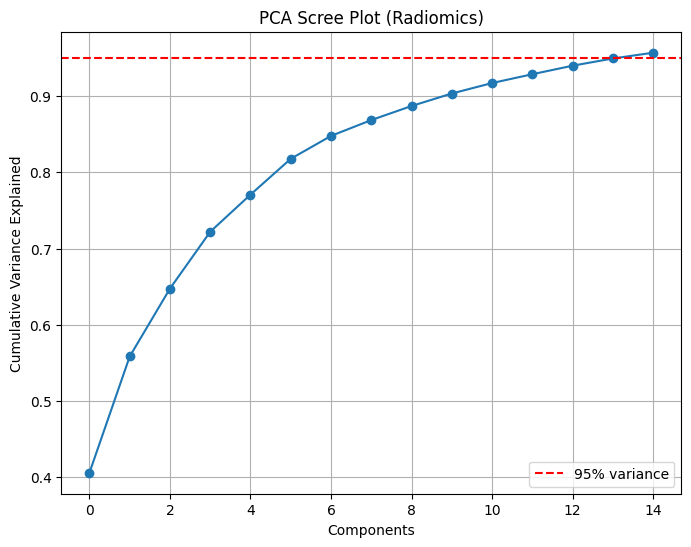

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% variance')
plt.title("PCA Scree Plot (Radiomics)")
plt.xlabel("Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.legend()
plt.show()


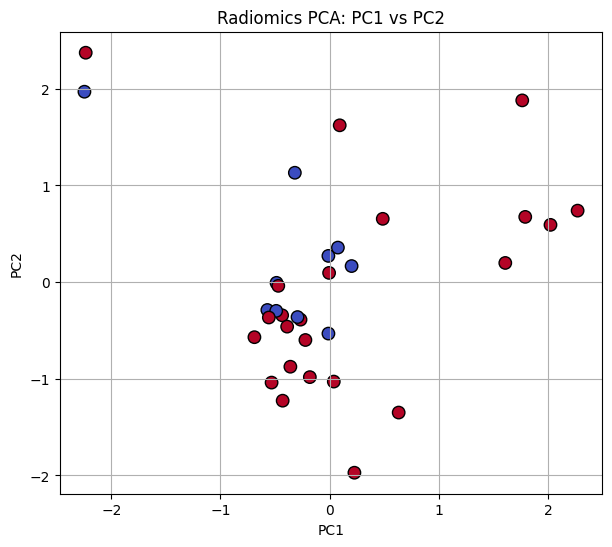

In [48]:
pc1, pc2 = X_rad_pca[:,0], X_rad_pca[:,1]

plt.figure(figsize=(7,6))
plt.scatter(pc1, pc2, c=y_fusion, cmap="coolwarm", s=80, edgecolor="k")
plt.title("Radiomics PCA: PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [49]:
X_rad_pca_df = pd.DataFrame(X_rad_pca,
    columns=[f"PCA_{i+1}" for i in range(X_rad_pca.shape[1])]
)

X_fusion_pca = pd.concat([X_clin.reset_index(drop=True),
                          X_rad_pca_df.reset_index(drop=True)], axis=1)

print("Fusion PCA:", X_fusion_pca.shape)


Fusion PCA: (33, 20)


**Ensemble Model**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        penalty="l1",
        solver="saga",
        class_weight="balanced",
        C=1.0,
        max_iter=10000
    ))
])
rf_model = RandomForestClassifier(
    n_estimators=3000,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

xgb_model = fusion_xgb

In [87]:
import numpy as np

def ensemble_predict_proba(X):
    p1 = lr_model.predict_proba(X)[:,1]
    p2 = rf_model.predict_proba(X)[:,1]
    p3 = xgb_model.predict_proba(X)[:,1]

    return (p1 + p2 + p3) / 3


In [88]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def eval_ensemble(X, y):
    skf = StratifiedKFold(5, shuffle=True, random_state=42)
    results = []

    for tr, val in skf.split(X, y):
        Xtr, Xv = X.iloc[tr], X.iloc[val]
        ytr, yv = y[tr], y[val]

        lr_model.fit(Xtr, ytr)
        rf_model.fit(Xtr, ytr)
        xgb_model.fit(Xtr, ytr)

        p = ensemble_predict_proba(Xv)
        pred = (p >= 0.5).astype(int)

        results.append({
            "roc_auc": roc_auc_score(yv, p),
            "accuracy": accuracy_score(yv, pred),
            "precision": precision_score(yv, pred, zero_division=0),
            "recall": recall_score(yv, pred, zero_division=0),
            "f1": f1_score(yv, pred, zero_division=0)
        })

    return pd.DataFrame(results).mean()

ensemble_results = eval_ensemble(X_fusion_pca, y_fusion)
ensemble_results


,0
roc_auc,0.805000
accuracy,0.785714
precision,0.860000
recall,0.880000
f1,0.847374


**Save Fusion Models**

In [92]:
import joblib

save_path = "/content/"

joblib.dump(pca, save_path + "fusion_pca.pkl")
joblib.dump(scaler_rad, save_path + "fusion_radiomics_scaler.pkl")

joblib.dump(lr_model, save_path + "fusion_lr_model.pkl")
joblib.dump(rf_model, save_path + "fusion_rf_model.pkl")
joblib.dump(xgb_model, save_path + "fusion_xgb_model.pkl")

best_weights = {
    "w1_lr": best_w1,
    "w2_rf": best_w2,
    "w3_xgb": best_w3
}
joblib.dump(best_weights, save_path + "fusion_ensemble_weights.pkl")

joblib.dump(list(X_fusion_pca.columns), save_path + "fusion_feature_list.pkl")




['/content/fusion_feature_list.pkl']

**Load and use model**

In [90]:
import joblib

path = "/content/"

pca = joblib.load(path + "fusion_pca.pkl")
scaler_rad = joblib.load(path + "fusion_radiomics_scaler.pkl")

lr_model = joblib.load(path + "fusion_lr_model.pkl")
rf_model = joblib.load(path + "fusion_rf_model.pkl")
xgb_model = joblib.load(path + "fusion_xgb_model.pkl")

best_weights = joblib.load(path + "fusion_ensemble_weights.pkl")
feature_list = joblib.load(path + "fusion_feature_list.pkl")

best_w1 = best_weights["w1_lr"]
best_w2 = best_weights["w2_rf"]
best_w3 = best_weights["w3_xgb"]



In [91]:
def fusion_ensemble_predict_proba(X_new):

    X_new = X_new[feature_list]

    p1 = lr_model.predict_proba(X_new)[:,1]
    p2 = rf_model.predict_proba(X_new)[:,1]
    p3 = xgb_model.predict_proba(X_new)[:,1]

    p = best_w1*p1 + best_w2*p2 + best_w3*p3
    return p

def fusion_ensemble_predict(X_new):
    p = fusion_ensemble_predict_proba(X_new)
    return (p >= 0.5).astype(int)
